# Repaso - Módulo 2

---
## Problema 1. Evaluación numérica de integrales utilizando Montecarlo
Escriba la función para integrar por el método Montecarlo de tipo 1

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
def montecarlo1(f,a,b,N):
    u=np.random.uniform(a,b,N)
    return np.mean(f(u))*(b-a)

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

In [39]:
N=np.logspace(1,5,5).astype('int')
N

array([    10,    100,   1000,  10000, 100000])

In [40]:
def f1(x):
    return np.sqrt(1+x**4)
def f2(x):
    return np.log(np.log(x))
def f3(x):
    return 1/np.log(x)
def f4(x):
    return np.exp(-x**2/2)

In [41]:
tabla=pd.DataFrame(index=N,columns=['f1','f2','f3','f4'])
for n in N:
    tabla.loc[n,'f1']=montecarlo1(f1,4,5,n)
    tabla.loc[n,'f2']=montecarlo1(f2,4,5,n)
    tabla.loc[n,'f3']=montecarlo1(f3,4,5,n)
    tabla.loc[n,'f4']=montecarlo1(f4,4,5,n)
tabla

,f1,f2,f3,f4
10,20.69961,0.392567,0.674494,0.000037
100,19.991635,0.409181,0.664119,0.000094
1000,20.250601,0.40439,0.668224,0.000078
10000,20.306279,0.405724,0.666258,0.000078
100000,20.358796,0.40575,0.667043,0.000078


## Problema 2.
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

In [54]:
def Bernoulli(x,y):
    return x**2+2*y**2<=-2*x+8*y-7

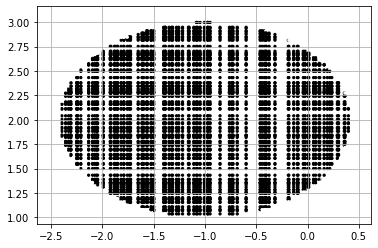

In [55]:
N=100
a1,b1=-2.5,0.5 # -3,1 # -5,5
a2,b2=1,3.1 # 0.5,3.5 # 0,4 # -5,5
x=np.random.uniform(a1,b1,N)
y=np.random.uniform(a2,b2,N)
X,Y=np.meshgrid(x,y)
plt.scatter(X,Y,c=~Bernoulli(X,Y),cmap='gray',s=5)
plt.grid()

Defina la función para resolver el área con el método 2 visto en clase

In [56]:
def montecarlo2(reg,a1,b1,a2,b2,N):
    x=np.random.uniform(a1,b1,N)
    y=np.random.uniform(a2,b2,N)
    B=reg(x,y)
    AR=(b1-a1)*(b2-a2)
    return AR*np.mean(B)

Encontrar el área con el número de términos deseados

In [57]:
N=np.logspace(1,5,5).astype('int')
N

array([    10,    100,   1000,  10000, 100000])

In [59]:
tabla=pd.DataFrame(index=N,columns=['Aprox.','Error'])
for n in N:
    tabla.loc[n,'Aprox.']=montecarlo2(Bernoulli,a1,b1,a2,b2,n)
    th=tabla.loc[n,'Aprox.']/((b1-a1)*(b2-a2))
    tabla.loc[n,'Error']=1/np.sqrt(n)*np.sqrt((1-th)/th)
tabla

,Aprox.,Error
10,4.41,0.20702
100,4.032,0.075
1000,4.2399,0.022043
10000,4.44528,0.006459
100000,4.433184,0.002052


---
## Problema 3. Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2021 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2020 y muestre sus gráficas.

In [1]:
import pandas as pd
import pandas_datareader.data as web

In [2]:
def getClose(names,start,end):
    return web.DataReader(names,'yahoo',start,end)['Adj Close']

In [3]:
names=['AAPL','MSFT']
start='2015-01-01'
end='2020-12-31'
data=getClose(names,start,end)
data.head()

Symbols,AAPL,MSFT
Date,,
2015-01-02,24.714506,41.108841
2015-01-05,24.018261,40.730820
2015-01-06,24.020525,40.132984
2015-01-07,24.357344,40.642891
2015-01-08,25.293203,41.838524


<AxesSubplot:xlabel='Date'>

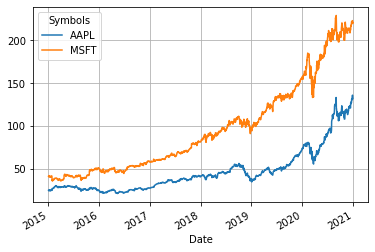

In [4]:
data.plot(grid=True)

Calcule los rendimientos diarios junto con sus características estadísticas

In [5]:
R=data.pct_change().dropna()
R.head()

Symbols,AAPL,MSFT
Date,,
2015-01-05,-0.028172,-0.009196
2015-01-06,0.000094,-0.014678
2015-01-07,0.014022,0.012705
2015-01-08,0.038422,0.029418
2015-01-09,0.001073,-0.008405


In [9]:
me=R.mean()
std=R.std()

In [10]:
me

Symbols
AAPL    0.001283
MSFT    0.001265
dtype: float64

In [11]:
std

Symbols
AAPL    0.018667
MSFT    0.017527
dtype: float64

Simule 1000 escenarios de rendimientos diarios para el 2021 (para cada una de las empresas)

<AxesSubplot:xlabel='Date'>

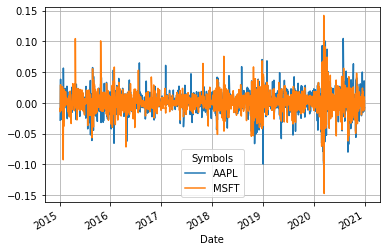

In [12]:
R.plot(grid=True)

In [13]:
pd.date_range?

In [17]:
import numpy as np

In [14]:
def simR(me,std,start,ndays,N):
    fechas=pd.date_range(start,periods=ndays)
    return pd.DataFrame(index=fechas,data=np.random.normal(me,std,(ndays,N))) # dimensión=(días simulados, número de simulaciones)

In [18]:
simAAPL=simR(me['AAPL'],std['AAPL'],'2021-01-01',365,1000)
simMSFT=simR(me['MSFT'],std['MSFT'],'2021-01-01',365,1000)

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'MSFT'}>]], dtype=object)

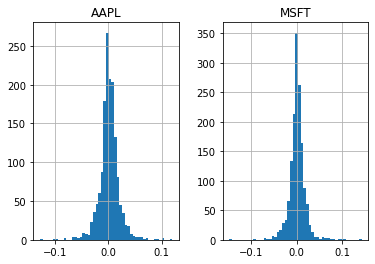

In [20]:
R.hist(bins=50) # Distribución de los rendimientos calculados

<AxesSubplot:>

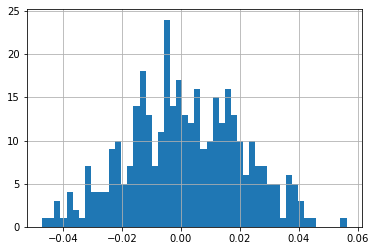

In [21]:
simAAPL[0].hist(bins=50) # Distribución de los rendimientos simulados

<AxesSubplot:>

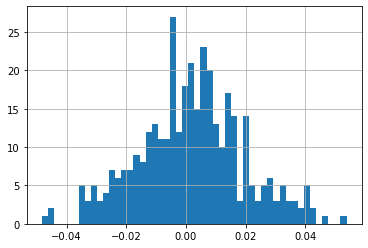

In [24]:
simMSFT[2].hist(bins=50)

Calcule los precios con base en los rendimientos simulados

In [25]:
simAAPL.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2021-01-01,0.021279,0.006065,0.028322,-0.000480,0.001146,0.000211,-0.031733,-0.007810,-0.038105,0.000296,...,-0.007739,0.019814,-0.027735,0.021006,-0.000308,0.009637,-0.001856,-0.024586,-0.003908,0.011154
2021-01-02,0.010783,0.016830,-0.016115,0.009057,0.002868,-0.000049,-0.010149,-0.002655,0.010925,0.051064,...,-0.029210,-0.004816,0.017702,0.008483,0.029214,0.006997,-0.013706,0.026490,-0.009355,-0.003987
2021-01-03,-0.004569,0.038797,-0.002790,0.009578,0.030542,0.010100,0.025098,-0.013497,0.026033,-0.031989,...,0.008806,-0.003815,0.030298,0.004331,0.034498,0.013599,-0.015456,-0.040166,-0.023353,-0.014187
2021-01-04,-0.003756,0.019451,-0.031474,-0.002716,0.008612,0.024713,-0.007781,0.016460,-0.033486,-0.024257,...,-0.002811,0.013186,0.037150,-0.017879,0.012166,0.002240,0.009783,0.023042,0.003058,0.019912
2021-01-05,0.005283,0.011434,-0.004607,-0.011820,-0.010100,-0.029091,-0.016716,0.034185,0.009590,0.017766,...,-0.003484,-0.000795,-0.020506,0.024798,-0.014966,0.060451,0.005895,0.031737,-0.005966,0.042912


In [26]:
data['AAPL'].iloc[-1]

131.70919799804688

In [27]:
AAPL=data['AAPL'].iloc[-1]*(simAAPL+1).cumprod()
MSFT=data['MSFT'].iloc[-1]*(simMSFT+1).cumprod()

Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

<AxesSubplot:>

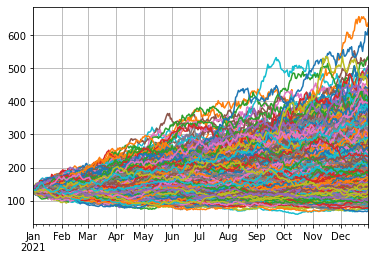

In [28]:
# Vamos a ver...
AAPL.plot(grid=True,legend=False)

In [29]:
UAAPL=1.2*data['AAPL'].iloc[-1]
UAAPL

158.05103759765623

<AxesSubplot:>

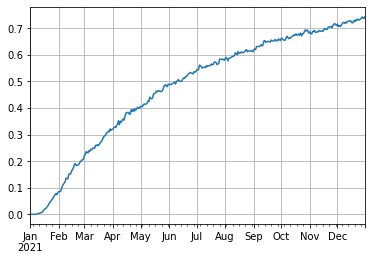

In [30]:
BAAPL=AAPL>UAAPL
PAAPL=BAAPL.mean(axis=1)
PAAPL.plot(grid=True)

<AxesSubplot:>

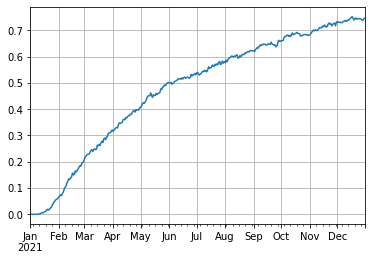

In [31]:
UMSFT=1.2*data['MSFT'].iloc[-1]
BMSFT=MSFT>UMSFT
PMSFT=BMSFT.mean(axis=1)
PMSFT.plot(grid=True)

Finalmente, grafique los datos reales del 2021 para ver que tan acertado fue nuestro análisis.

In [33]:
import matplotlib.pyplot as plt

<AxesSubplot:>

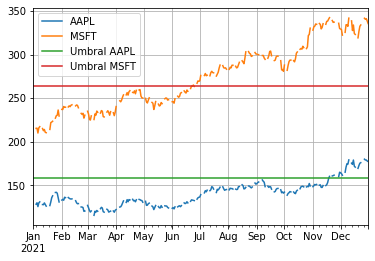

In [37]:
dt2021=getClose(names,'2021-01-01','2021-12-31')
fechas=pd.date_range('2021-01-01',periods=365)
dfUAAPL=pd.DataFrame(index=fechas,data=UAAPL*np.ones(365),columns=['Umbral AAPL'])
dfUMSFT=pd.DataFrame(index=fechas,data=UMSFT*np.ones(365),columns=['Umbral MSFT'])
dt2021=pd.concat([dt2021,dfUAAPL,dfUMSFT],axis=1)
dt2021.plot(grid=True)